# <font color = 'indianred'> **REFACTOR - Linear Regression using nn.Module**

In [12]:
# Importing PyTorch Library
import torch

# Importing random library to generate random dataset
import random

# To get deterministic results
torch.manual_seed(456)
random.seed(123)

## <font color = 'indianred'> **Generating a Dataset**

We will generate a dummy dataset having 1000 observations and 2 features.
The observations are sampled from standard normal distribution.

Let us have our true parameter values to be w = [3, -4.5] and b = 5.2.

`y = Xw.T + b + noise`

We will further assume that nose will be normally distributed with mean 0 and standard deviation of 0.01.


In [13]:
def generate_dataset(w, b, num):
    """
    Generates a synthetic dataset of features and labels.

    Args:
        w: weights (a tensor of shape (1, n))
        b: bias (a scalar)
        num: number of observations

    Returns:
        A tuple (X, y), where:
        X: a tensor of shape (num, n) containing the features (drawn from a standard normal distribution)
        y: a tensor of shape (num, 1) containing the labels (generated from X, w, and b, with added noise)
    """

    # Generate X values from standard normal distribution
    X = torch.randn((num, w.shape[1]))

    # Generate y values: y = Xw + b
    y = torch.mm(X, w.T) + b

    # Add noise to labels
    y += torch.randn_like(y) * 0.01

    # Return the dataset
    return X, y

In [ ]:
# Initializing actual weight and bias values
w_true = torch.Tensor([3, -4.5]).view(1,-1)
b_true = 5.2

# Calling the generate_dataset function to create a dummy dataset
features, labels = generate_dataset(w_true, b_true, 1000)

## <font color = 'indianred'> **Visualization of the dataset**

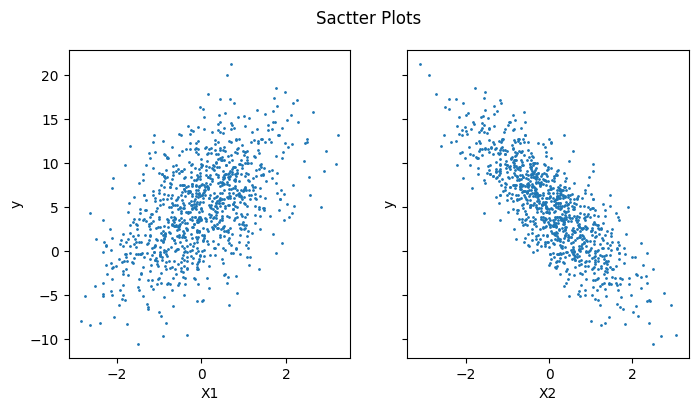

In [ ]:
# Importing matplotlib library for visualizing dataset
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
fig.suptitle('Sactter Plots')

# We will create a scatter plot between feature and labels
ax1.scatter(features[:, 0].detach().numpy(), labels.detach().numpy(),s = 1)
ax1.set(xlabel='X1')
ax1.set(ylabel='y')
ax2.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), s = 1)
ax2.set(xlabel='X2')
ax2.set(ylabel='y')
plt.show()

In [ ]:
wandb.log({"scatter plot ": wandb.Image(fig)})

From the above visualization, we can observe a linear relation between features and label values.

## <font color = 'indianred'> **Reading the dataset**

For training our model, we will use mini batches from the dataset and use them to update our model.

To simplify this process, we will define a function which will shuffle the dataset and access it in mini batches.

In [ ]:
# def read_data(batch_size, features, labels):
#     """
#     Returns an iterator that provides minibatches of features and labels.

#     Args:
#         batch_size: the number of examples in each minibatch
#         features: a tensor of shape (num_examples, num_features) containing the feature data
#         labels: a tensor of shape (num_examples, 1) containing the label data

#     Yields:
#         A tuple (X, y), where:
#         X: a tensor of shape (batch_size, num_features) containing the features of the minibatch
#         y: a tensor of shape (batch_size, 1) containing the labels of the minibatch
#     """

#     # Number of examples in the dataset
#     num_examples = features.shape[0]

#     # Shuffle the indices
#     indices = torch.randperm(num_examples)

#     # Iterate over minibatches of data
#     for i in range(0, num_examples, batch_size):
#         batch_indices = indices[i:min(i + batch_size, num_examples)]
#         yield features[batch_indices], labels[batch_indices]

## <font color = 'indianred'> **Linear Regression Model**

In [ ]:
# def linear_reg(X, w, b):
#     """
#     Computes a linear regression model y = Xw + b.

#     Args:
#         X: a tensor of shape (num_examples, num_features) containing the feature data
#         w: a tensor of shape (1, num_features) containing the model weights
#         b: a scalar containing the model bias

#     Returns:
#         A tensor of shape (num_examples, 1) containing the predicted labels
#     """
#     return torch.mm(X, w.T) + b


## <font color = 'indianred'> **Loss Function**

In [ ]:
# def mse_loss(ypred, y):
#     """
#     Computes the mean squared error loss between predicted and actual labels.

#     Args:
#         ypred: a tensor of shape (num_examples, 1) containing the predicted labels
#         y: a tensor of shape (num_examples, 1) containing the actual labels

#     Returns:
#         A scalar tensor containing the mean squared error loss
#     """
#     error = ypred - y
#     mean_squared_error = torch.mean(error**2)
#     return mean_squared_error


## <font color = 'indianred'> **Optimization Algorithm**

In [ ]:
# weight update step
# def sgd(params, grads, lr):
#     """
#     Performs a stochastic gradient descent (SGD) update on a set of parameters.

#     Args:
#         params: a list of tensors representing the parameters to update
#         grads: a list of tensors representing the gradients of the parameters
#         lr: the learning rate for the update

#     Returns:
#         None
#     """
#     for param, grad in zip(params, grads):
#         param -= lr * grad



## <font color = 'indianred'> **Data Preparation**

In [14]:
# Create dataset
from torch.utils.data import TensorDataset
dataset = TensorDataset(features, labels)

In [15]:
bs = 2
from torch.utils.data import DataLoader
dataloader = DataLoader(dataset,
                        batch_size=bs,
                        shuffle=True)

## <font color = 'indianred'> **Model Configuration**

In [20]:
lr = 0.005
epochs = 10
# model
model = torch.nn.Linear(in_features=2, out_features=1)

# loss function
loss_fn = torch.nn.MSELoss(reduction='mean')

# optimizer
optimizer = torch.optim.SGD(model.parameters(), lr = lr)

## <font color = 'indianred'> **Model Training**

**Model Training** involves five steps:

- Step 0: Randomly initialize parameters / weights
- Step 1: Compute model's predictions - forward pass
- Step 2: Compute loss
- Step 3: Compute the gradients
- Step 4: Update the parameters
- Step 5: Repeat steps 1 - 4



In [ ]:
# # Step 0: Initialize the model parameters
# w = torch.normal(mean=0, std=0.01, size=(1, 2), requires_grad = True)
# b = torch.zeros(1, requires_grad=True)

# # Print the initial parameter values
# print('Initial weights:', w)
# print('Initial bias:', b)
# print(w.shape)

In [21]:
# Iterate over the whole dataset
for epoch in range(epochs):

    # Iterate over mini batch
    # for X, y in read_data(batch_size, features, labels):
    for X, y in dataloader:

        # step 1 :forward pass - compute predictions
        # ypred = linear_reg(X, w, b)
        ypred = model(X)

        # step 2: Calculate minibatch loss
        loss = loss_fn(ypred, y)


        # step 3: Compute gradient on loss with respect to weights and bias
        # grad_w = 2 *(ypred-y).T.mm(X)/len(y)
        # grad_b = 2 *(ypred-y).sum()/len(y)
        optimizer.zero_grad()
        loss.backward()

        # step 4: Update parameters using their gradient using optimization algorithm
        # sgd([w, b], [grad_w, grad_b], lr)
        optimizer.step()


    # Calculate and print loss for the complete epoch
    # train_l = loss(model(features, w, b), labels)
    train_l = loss_fn(model(features), labels)
    print(f'epoch {epoch + 1}, loss {float(train_l.item()):f}')

epoch 1, loss 0.004440
epoch 2, loss 0.000108
epoch 3, loss 0.000109
epoch 4, loss 0.000108
epoch 5, loss 0.000109
epoch 6, loss 0.000109
epoch 7, loss 0.000109
epoch 8, loss 0.000109
epoch 9, loss 0.000109
epoch 10, loss 0.000108


We can observe that with each epoch, our loss is getting reduced hence our linear regression model is able to classify accurately.

Now since we generated the dataset ourselves we know the actual values for weights and bias, so we can check the error in both of them.

In [22]:
model.state_dict()

OrderedDict([('weight', tensor([[ 3.0006, -4.5000]])),
             ('bias', tensor([5.1997]))])

In [30]:
# Printing error in weights and bias
print(f'Error in estimating w: {w_true.view(1,-1) - model.weight.data}')
print(f'Error in estimating b: {b_true - model.bias.data}')
print(f'estimated value of w: {model.weight.data}')
print(f'estimated value of b: {model.bias.data}')

Error in estimating w: tensor([[-5.9843e-04,  3.8624e-05]])
Error in estimating b: tensor([0.0003])
estimated value of w: tensor([[ 3.0006, -4.5000]])
estimated value of b: tensor([5.1997])


We can see that the error is minimal thus, our model is working well.